In [60]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

https://lionbridge.ai/datasets/10-open-datasets-for-linear-regression/




In [61]:
# dataset = pd.read_csv('https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv', sep=";")
dataset = pd.read_csv('/content/Real estate.csv')

dataset.shape

(414, 8)

In [62]:
dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [63]:
dataset.isnull().any()
"""
Once the above code is executed, all the columns should give False, 
In case for any column you find True result, 
then remove all the null values from that column using below code.
"""
# dataset = dataset.fillna(method='ffill')

'\nOnce the above code is executed, all the columns should give False, \nIn case for any column you find True result, \nthen remove all the null values from that column using below code.\n'

In [64]:
# X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',\
#              'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
# y = dataset['quality'].values

X = dataset.iloc[:,[2,3,4,5,6]]
y = dataset.iloc[:, 7]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [65]:
X

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


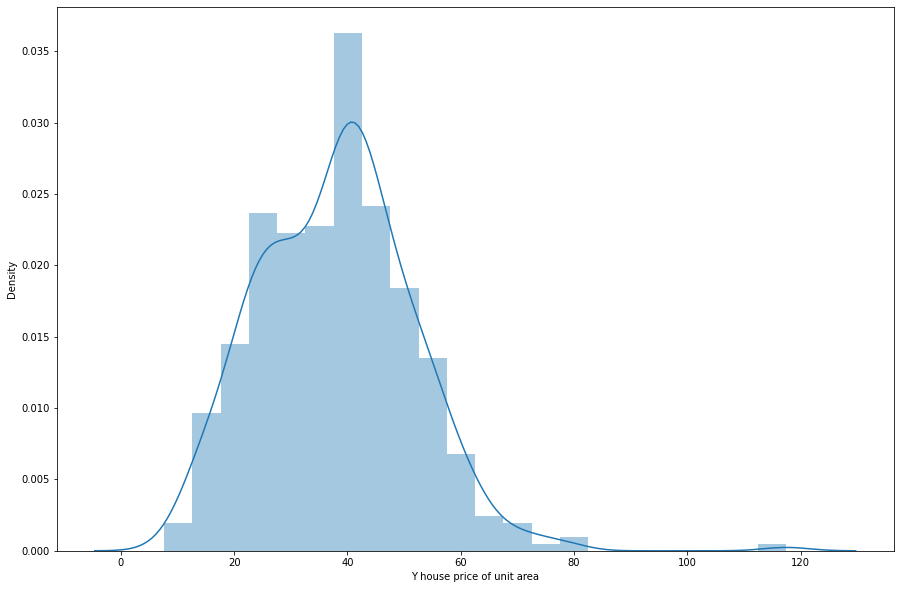

In [66]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['Y house price of unit area'])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
regressorL = LinearRegression()  
regressorL.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# coeff_df = pd.DataFrame(regressorL.coef_, X.columns, columns=['Coefficient'])  
# coeff_df
#To retrieve the intercept:
print(regressorL.intercept_)

#For retrieving the slope:
print(regressorL.coef_)

-5797.588211109447
[-2.64990176e-01 -4.14590169e-03  1.13191477e+00  2.39912594e+02
 -1.23561949e+00]


In [70]:
type(y_test)

pandas.core.series.Series

In [71]:
y_predL = regressorL.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_predL})

dfL = df.head(25)
print(dfL)

     Actual  Predicted
356    45.3  41.390747
170    14.4  12.355353
224    46.0  41.105005
331    15.6  12.168956
306    50.2  40.361295
325    38.1  40.212031
150    48.5  39.903510
10     41.4  33.927403
21     51.6  48.095705
268    40.1  44.579505
316    42.0  45.263084
59     42.4  40.664442
402    28.5  40.784775
198    39.1  40.217492
348    53.7  48.745186
76     36.8  35.916576
264    40.6  40.006915
164    55.2  42.357454
12     39.3  41.865700
188    44.3  43.590170
342    53.5  52.188825
37     25.3  30.845863
334    22.8  41.180042
54     51.7  45.927635
145    45.5  47.426482


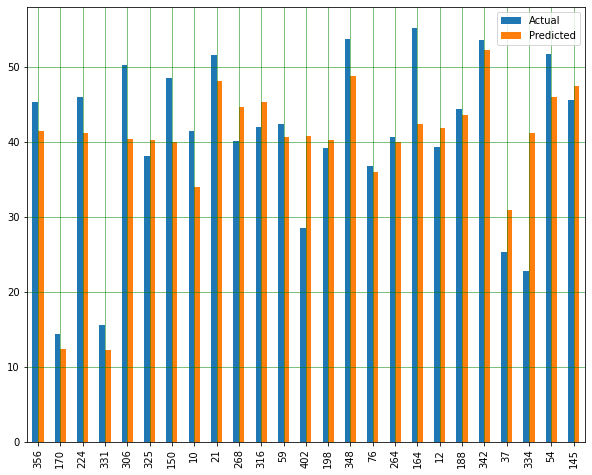

In [72]:
dfL.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predL))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predL))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predL)))

Mean Absolute Error: 5.745927475462485
Mean Squared Error: 62.172235622412884
Root Mean Squared Error: 7.884937261793076


Ridge

In [74]:
from sklearn import preprocessing
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [75]:
# alpha is metter
# ridge_reg = Ridge()
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [76]:
#To retrieve the intercept:
print(ridge_reg.intercept_)

#For retrieving the slope:
print(ridge_reg.coef_)

-69.34190769470482
[-2.52717544e-01 -5.33801018e-03  1.24540326e+00  8.12025207e+00
 -7.41768618e-01]


In [77]:
y_pred_r = ridge_reg.predict(X_test)
# df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_r.flatten()})
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_r})
dfR = df.head(25)

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_r))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_r))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))

Mean Absolute Error: 6.0757487086026805
Mean Squared Error: 65.37080611878626
Root Mean Squared Error: 8.085221463805816


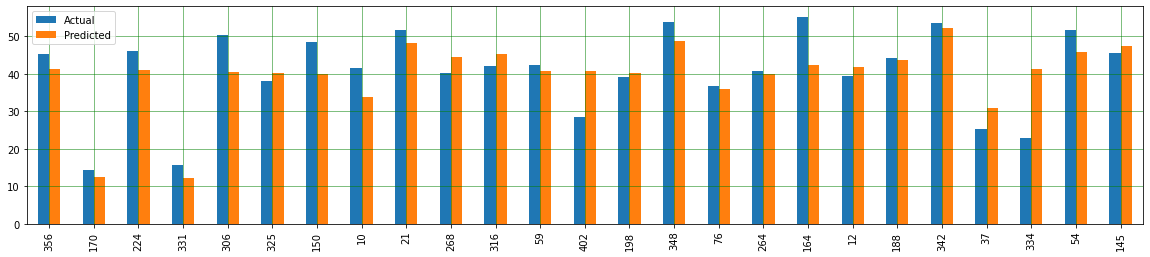

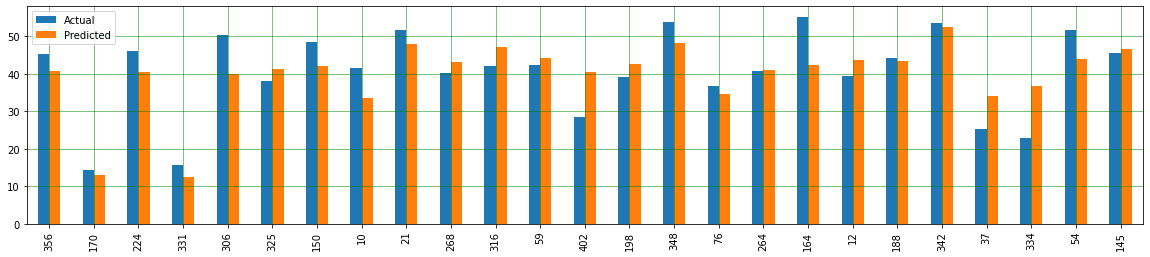

In [79]:
number_compare = 50
dfL.plot(kind='bar',figsize=(20,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

dfR.plot(kind='bar',figsize=(20,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [80]:
X_test.shape

(83, 5)

In [81]:
y_test.shape

(83,)

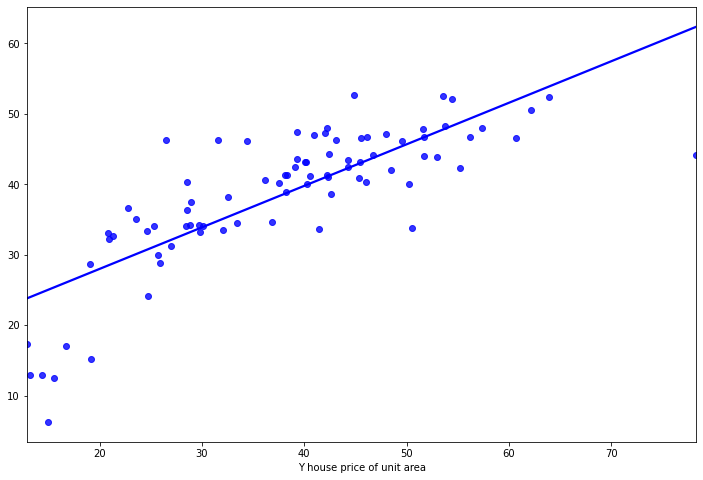

In [88]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred_r, ci=None, color="b")

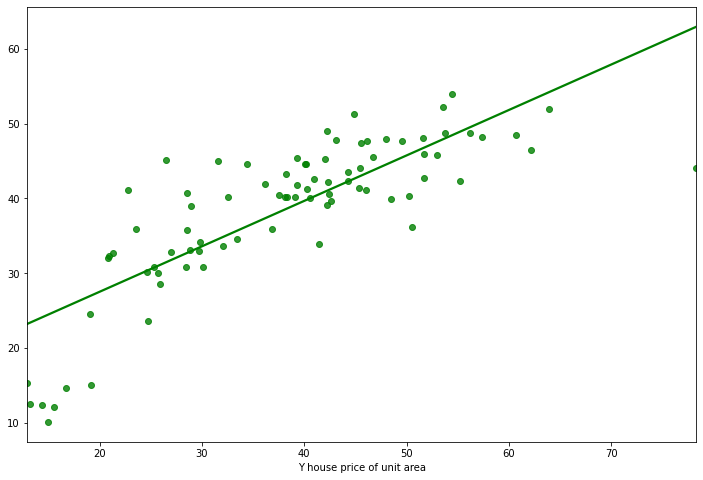

In [87]:
sns.regplot(x=y_test, y=y_predL, ci=None, color="g")

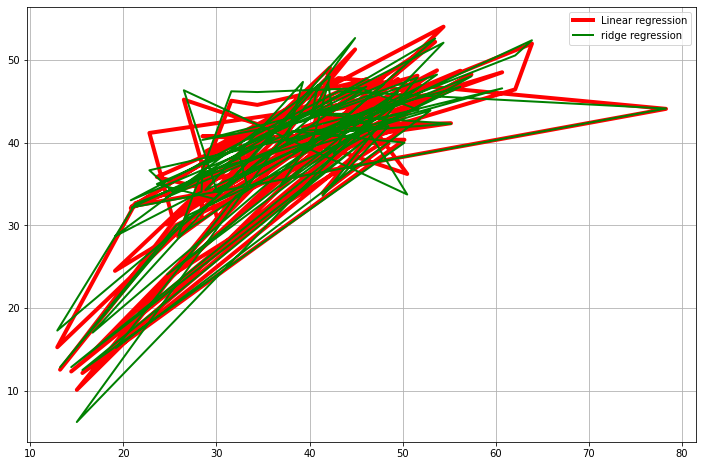

In [84]:
# plt.rcParams['figure.figsize'] = [12, 8]
# plt.grid()
# plt.plot(y_test, y_predL, color='red', linewidth=4, label="Linear regression")
# plt.plot(y_test, y_pred_r, color='green', linewidth=2, label="ridge regression")
# plt.legend()
# plt.show()

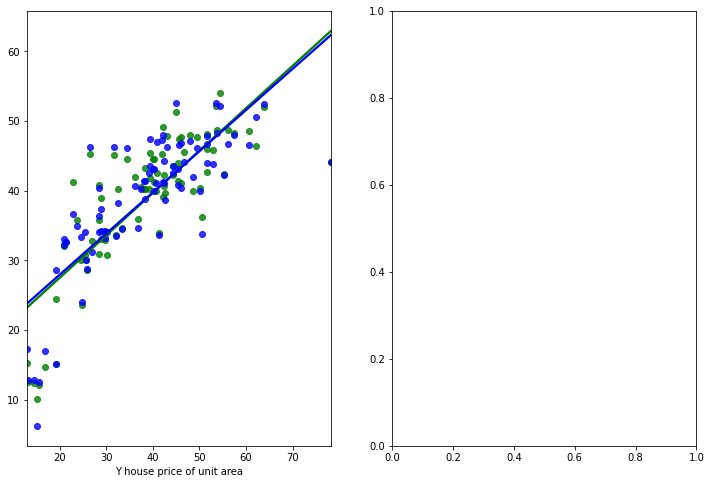

In [92]:
fig, axs = plt.subplots(ncols=2)
sns.regplot(x=y_test, y=y_predL, ci=None, ax=axs[0], color="g")
sns.regplot(x=y_test, y=y_pred_r, ci=None, ax=axs[0], color="b")
# sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])